In [67]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

import matplotlib.pyplot  as plt
from sklearn.manifold import TSNE

food = pd.read_csv('food_DB/food_clustering.csv',index_col='식품명')
#food = food[food['식품대분류명']=='찌개 및 전골류']
food = food[['당류(g)', '인(mg)', '칼륨(mg)', '나트륨(mg)']] #'에너지(kcal)', '단백질(g)','지방(g)', '탄수화물(g)', 

sc = StandardScaler()
food_scaled = sc.fit_transform(food)

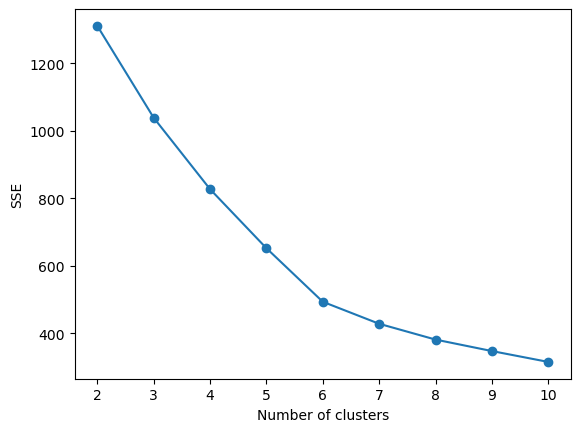

In [69]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(food_scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [70]:
kmeans = KMeans(n_clusters=6, random_state=0)
food['cluster1'] = kmeans.fit(food_scaled).labels_

dbscan = DBSCAN(eps=0.3, min_samples=10)
food['cluster2'] = dbscan.fit(food_scaled).labels_

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


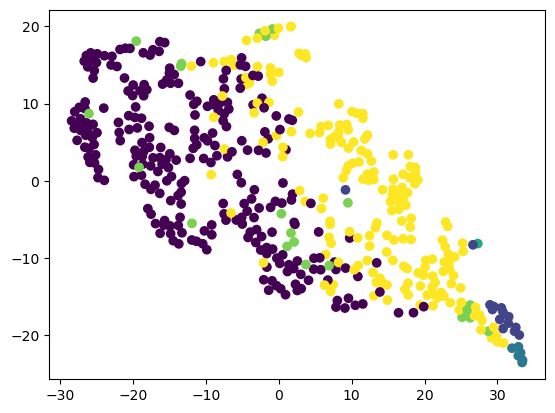

In [71]:
transformed = TSNE(n_components=2).fit_transform(food)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys, c=food['cluster1'])
plt.show()

In [73]:
food.groupby('cluster1').mean()

,당류(g),인(mg),칼륨(mg),나트륨(mg),cluster2
cluster1,,,,,
0,0.830506,55.011673,118.517510,260.789883,-0.105058
1,8.067143,765.714286,545.214286,1736.857143,-1.000000
2,4.240000,233.833333,510.833333,5342.333333,-1.000000
3,17.240000,211.000000,3798.000000,1305.000000,-1.000000
4,19.001429,127.476190,176.000000,509.190476,-1.000000
5,3.576503,123.535519,302.508197,534.672131,-0.939891
